In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import LSTM
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from datetime import datetime
from keras import optimizers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
from numpy import savetxt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Wanliu.csv to Wanliu.csv


In [ ]:
data=read_csv("Wanliu.csv")
data

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,1,2013,3,1,0,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
1,2,2013,3,1,1,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7
2,3,2013,3,1,2,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
3,4,2013,3,1,3,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1
4,5,2013,3,1,4,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0
35060,35061,2017,2,28,20,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0
35061,35062,2017,2,28,21,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1
35062,35063,2017,2,28,22,12.0,31.0,5.0,47.0,500.0,50.0,7.8,1012.9,-12.6,0.0,NNE,1.0


In [ ]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('Wanliu.csv',index_col=0, date_parser=parse,parse_dates=[['year', 'month', 'day', 'hour']])

In [ ]:
dataset

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
year_month_day_hour,,,,,,,,,,,,,
2013-03-01 00:00:00,1,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
2013-03-01 01:00:00,2,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7
2013-03-01 02:00:00,3,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
2013-03-01 03:00:00,4,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1
2013-03-01 04:00:00,5,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,35060,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0
2017-02-28 20:00:00,35061,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0
2017-02-28 21:00:00,35062,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1


In [ ]:
dataset.drop("No", axis=1, inplace=True)

In [ ]:
dataset

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
year_month_day_hour,,,,,,,,,,,,
2013-03-01 00:00:00,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
2013-03-01 01:00:00,9.0,9.0,6.0,28.0,400.0,50.0,-1.1,1023.2,-18.2,0.0,N,4.7
2013-03-01 02:00:00,3.0,6.0,NaN,19.0,400.0,55.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
2013-03-01 03:00:00,11.0,30.0,8.0,14.0,NaN,NaN,-1.4,1024.5,-19.4,0.0,NW,3.1
2013-03-01 04:00:00,3.0,13.0,9.0,NaN,300.0,54.0,-2.0,1025.2,-19.5,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,11.0,27.0,4.0,20.0,300.0,81.0,12.6,1011.9,-14.3,0.0,N,2.0
2017-02-28 20:00:00,15.0,43.0,6.0,55.0,500.0,45.0,9.4,1012.3,-11.9,0.0,WSW,1.0
2017-02-28 21:00:00,13.0,35.0,7.0,48.0,500.0,48.0,8.7,1012.8,-13.7,0.0,N,1.1


In [ ]:
dataset.isnull().sum()

PM2.5     382
PM10      284
SO2       575
NO2      1070
CO       1812
O3       2107
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd        123
WSPM       14
dtype: int64

In [ ]:
dataset=dataset.fillna(method="pad")

In [ ]:
dataset.isnull().sum()

PM2.5    0
PM10     0
SO2      0
NO2      0
CO       0
O3       0
TEMP     0
PRES     0
DEWP     0
RAIN     0
wd       0
WSPM     0
dtype: int64

In [ ]:
dataset.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.00000
mean,83.516054,110.658234,18.417596,65.970555,1331.700091,46.920645,13.426323,1011.102728,3.263752,0.068224,1.50130
std,82.177505,93.613123,22.743577,38.242816,1267.955273,54.452884,11.348467,10.356530,13.679802,0.896471,1.10461
min,2.000000,2.000000,0.285600,1.642400,100.000000,0.214200,-15.800000,985.900000,-34.900000,0.000000,0.00000
25%,23.000000,40.000000,4.000000,36.543400,600.000000,3.000000,3.100000,1002.500000,-8.100000,0.000000,0.80000
50%,59.000000,88.000000,10.000000,61.000000,900.000000,29.000000,14.300000,1010.800000,4.000000,0.000000,1.20000
75%,116.000000,153.000000,23.000000,90.000000,1600.000000,70.000000,22.900000,1019.400000,15.800000,0.000000,2.00000
max,957.000000,951.000000,282.000000,264.000000,10000.000000,364.000000,40.500000,1040.300000,28.500000,72.500000,11.20000


In [ ]:
dataset_columns = dataset.columns.tolist()
dataset_columns

['PM2.5',
 'PM10',
 'SO2',
 'NO2',
 'CO',
 'O3',
 'TEMP',
 'PRES',
 'DEWP',
 'RAIN',
 'wd',
 'WSPM']

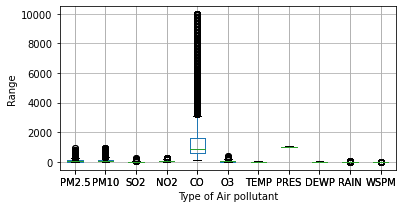

In [ ]:
#Box plot
plt.rcParams["figure.figsize"] = [5.7, 3]
plt.rcParams["figure.autolayout"] = True
dataset.boxplot()
p = dataset.boxplot(grid=True)
p.set_xlabel('Type of Air pollutant')
p.set_ylabel('Range')

plt.savefig(r'./Wanliusobaric.jpg', dpi=400)
plt.show()

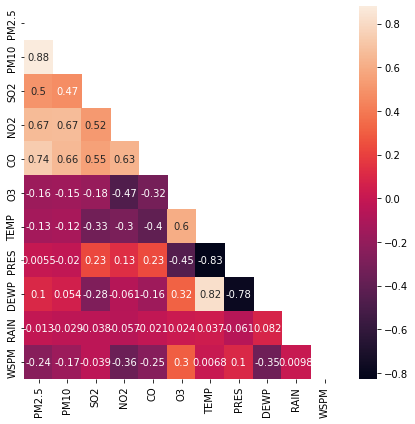

In [ ]:
# applying mask
mask = np.triu(np.ones_like(dataset.corr()))
f, ax = plt.subplots(figsize=(6, 6))
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(dataset.corr(),annot=True, mask=mask)
plt.savefig(r'./Wanliuheat.jpg', dpi=400) 
# displaying heatmap
plt.show()

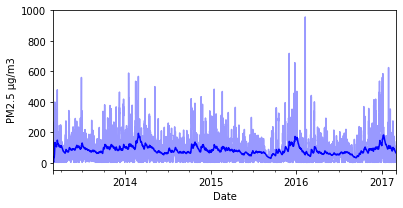

In [ ]:
dataset['PM2.5'].to_frame()
f.set_figwidth(5)
f.set_figheight(3)
p=dataset["PM2.5"].plot(color= "blue", alpha=0.4)
#p=dataset['PM2.5'].rolling(168).mean().plot(color= "green")
p=dataset['PM2.5'].ewm(span=720).mean().plot(color= "blue")
p.set_xlabel('Date')
p.set_ylabel('PM2.5 µg/m3')
plt.savefig(r'./Wanliu.jpg', dpi=400)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode non categorical values
values = dataset.values
encoder = LabelEncoder()
values[:,10] = encoder.fit_transform(values[:,10])
values = values.astype('float32')
values[:,10]

array([6., 3., 6., ..., 3., 5., 4.], dtype=float32)

In [ ]:
values

array([[ 8. ,  8. ,  6. , ...,  0. ,  6. ,  4.4],
       [ 9. ,  9. ,  6. , ...,  0. ,  3. ,  4.7],
       [ 3. ,  6. ,  6. , ...,  0. ,  6. ,  5.6],
       ...,
       [13. , 35. ,  7. , ...,  0. ,  3. ,  1.1],
       [12. , 31. ,  5. , ...,  0. ,  5. ,  1. ],
       [ 7. , 25. ,  6. , ...,  0. ,  4. ,  1.1]], dtype=float32)

In [ ]:
#Normalising data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_dataset = scaler.fit_transform(values)

In [ ]:
#Creating a window for previous data
def to_supervised(train):
  window_size = 4
  X = []
  Y = []
  for i in range(window_size, len(train)):
    X.append(train[i-window_size:i,:])
    Y.append(train[i,0:1])
    
  return X,Y

In [ ]:
X, Y = to_supervised(scaled_dataset)
X = np.array(X)
Y = np.array(Y)
print('Y' ,Y.shape)
print('X' ,X.shape)

Y (35060, 1)
X (35060, 4, 12)


In [ ]:
#Splitting the dataset
n_train = 24*365
X_train, X_test = X[n_train:,] , X[:n_train,]
print('X_train' ,X_train.shape)
print('X_test' ,X_test.shape)

Y_train, Y_test = Y[n_train:,] , Y[:n_train,]
print('Y_train' ,Y_train.shape)
print('Y_test' ,Y_test.shape)

X_train (26300, 4, 12)
X_test (8760, 4, 12)
Y_train (26300, 1)
Y_test (8760, 1)


In [ ]:
#Lstm model build
model = Sequential()
model.add(LSTM(units = 50,return_sequences = True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units = 50))
model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error') 

In [ ]:
#Train the model
lstm_history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size = 64, verbose=2)

Epoch 1/100
411/411 - 13s - loss: 0.0020 - val_loss: 0.0013 - 13s/epoch - 31ms/step
Epoch 2/100
411/411 - 5s - loss: 0.0010 - val_loss: 7.5309e-04 - 5s/epoch - 13ms/step
Epoch 3/100
411/411 - 5s - loss: 7.5153e-04 - val_loss: 6.7597e-04 - 5s/epoch - 13ms/step
Epoch 4/100
411/411 - 5s - loss: 6.3973e-04 - val_loss: 5.8955e-04 - 5s/epoch - 13ms/step
Epoch 5/100
411/411 - 5s - loss: 5.6544e-04 - val_loss: 5.4988e-04 - 5s/epoch - 12ms/step
Epoch 6/100
411/411 - 6s - loss: 5.2270e-04 - val_loss: 6.1083e-04 - 6s/epoch - 15ms/step
Epoch 7/100
411/411 - 5s - loss: 5.1787e-04 - val_loss: 6.3656e-04 - 5s/epoch - 13ms/step
Epoch 8/100
411/411 - 8s - loss: 5.0199e-04 - val_loss: 5.8810e-04 - 8s/epoch - 20ms/step
Epoch 9/100
411/411 - 5s - loss: 4.9360e-04 - val_loss: 5.5334e-04 - 5s/epoch - 12ms/step
Epoch 10/100
411/411 - 5s - loss: 4.8731e-04 - val_loss: 5.2017e-04 - 5s/epoch - 13ms/step
Epoch 11/100
411/411 - 5s - loss: 4.8714e-04 - val_loss: 6.0423e-04 - 5s/epoch - 13ms/step
Epoch 12/100
411/4

In [ ]:
from keras.models import load_model
model.save('AirPollutionLSTM.h5')

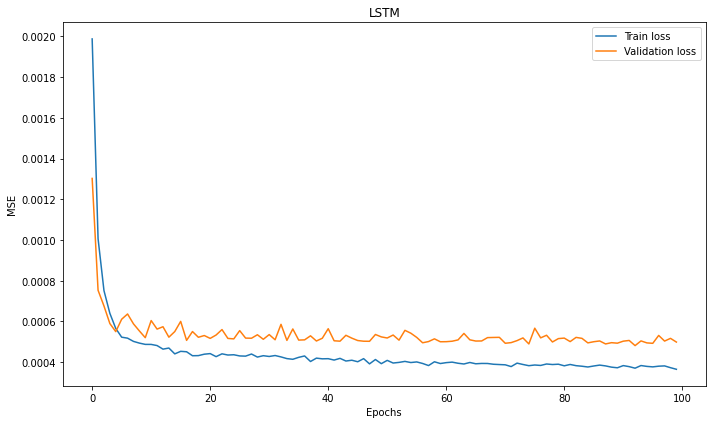

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(lstm_history.history['loss'], label='Train loss')
plt.plot(lstm_history.history['val_loss'], label='Validation loss')
plt.title("LSTM")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()
plt.savefig('graph.png')

In [ ]:
RMSE1=[]
RMAE1=[]
MAPE1=[]
R22=[]

for i in range(40, 181, 5):
  Y_pred = model.predict(X_test[:i,:])
  #print(Y_pred)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  #Scaling back to the original scale
  d = scaled_dataset[:i,:]
  Y_predicted = np.concatenate((Y_pred,d[:i,1:]), axis =1)
  Y_tested = np.concatenate((Y_test[:i,], d[:i,1:]), axis = 1)
  Y_predicted = scaler.inverse_transform(Y_predicted)
  Y_tested = scaler.inverse_transform(Y_tested)
  Y_predicted = Y_predicted[:,0:1]
  Y_tested = Y_tested[:i,0:1]
  mse = mean_squared_error(Y_tested, Y_predicted)
  rmse = np.sqrt(mse)
  print("RMSE at %s = %s" % (i, rmse))
  RMSE1=np.append(RMSE1,rmse)
  mae = mean_absolute_error(Y_tested, Y_predicted)
  rmae = np.sqrt(mae)
  RMAE1=np.append(RMAE1,rmae)
  print("RMAE at %s = %s" % (i, rmae))
  mape = mean_absolute_percentage_error(Y_tested, Y_predicted)
  print("MAPE at %s = %s" % (i, mape))
  MAPE1=np.append(MAPE1,mape)
  #R2 score
  R2 = r2_score( Y_predicted, Y_tested)
  print("R2 at %s = %s" % (i, R2))
  R22=np.append(R22,R2)

2/2 [==============================] - 1s 9ms/step
RMSE at 40 = 4.399933
RMAE at 40 = 1.8858267
MAPE at 40 = 0.5174014
R2 at 40 = 0.8999436212537162
2/2 [==============================] - 0s 9ms/step
RMSE at 45 = 4.9609876
RMAE at 45 = 1.9888604
MAPE at 45 = 0.46953273
R2 at 45 = 0.9613717864807558
2/2 [==============================] - 0s 7ms/step
RMSE at 50 = 5.4419703
RMAE at 50 = 2.0717523
MAPE at 50 = 0.4303178
R2 at 50 = 0.9733344442448747
2/2 [==============================] - 0s 9ms/step
RMSE at 55 = 6.015866
RMAE at 55 = 2.1732974
MAPE at 55 = 0.39964226
R2 at 55 = 0.9729038722987194
2/2 [==============================] - 0s 11ms/step
RMSE at 60 = 6.964375
RMAE at 60 = 2.317656
MAPE at 60 = 0.3812357
R2 at 60 = 0.9664502815182027
3/3 [==============================] - 0s 6ms/step
RMSE at 65 = 11.865782
RMAE at 65 = 2.6821997
MAPE at 65 = 0.38509375
R2 at 65 = 0.897086841747771
3/3 [==============================] - 0s 5ms/step
RMSE at 70 = 14.480397
RMAE at 70 = 2.9192173
MAPE

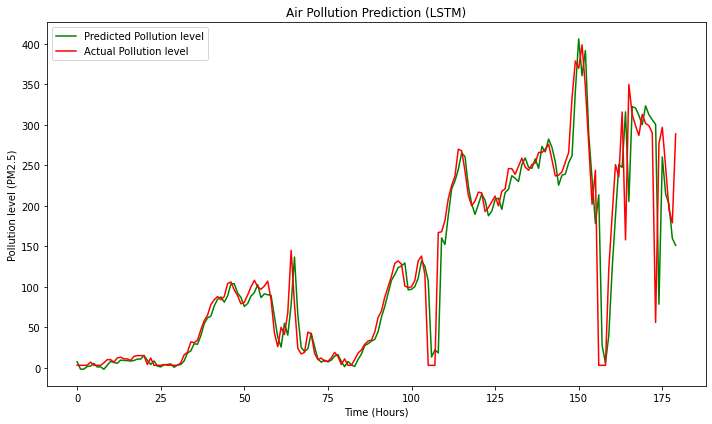

<Figure size 576x576 with 0 Axes>

In [ ]:
plt.figure(figsize=(10,6))  
plt.plot(Y_predicted, color= 'green',label = 'Predicted Pollution level')
plt.plot(Y_tested , color = 'red',label = 'Actual Pollution level')
plt.title("Air Pollution Prediction (LSTM)")
plt.xlabel("Time (Hours)")
plt.ylabel("Pollution level (PM2.5)")
plt.legend()
plt.show()
plt.savefig('graph_LSTM.png')

In [ ]:
savetxt('Predict_LSTM.csv', Y_predicted, delimiter=',')

In [ ]:
savetxt('Test_LSTM.csv', Y_test, delimiter=',')